In [1]:
from models.vae import VAE
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [2]:
rows = []
with open("data/dim512.txt") as file:
    for row in file:
        r = [int(x) for x in row.split("   ") if x != ""]
        rows.append(pd.Series(r))

In [10]:
data = pd.DataFrame(rows)
train, test = train_test_split(data, test_size=0.3, shuffle=True)

In [11]:
class Data(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.from_numpy(X)
        self.y = y
        if y is not None:
            self.y = torch.from_numpy(y)
            
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx].float(), self.y[idx].long()
        return self.X[idx].float()

In [12]:
train = Data(train.values)
test = Data(test.values)

In [13]:
vae = VAE(512, 2)
t = Trainer(vae, train, test)

In [14]:
losses = t.fit(20)

Epoch: 0, Train: 1.906396416299165e+20, Test: 6804048336.0
Epoch: 1, Train: 6301740048.0, Test: 5207852864.0
Epoch: 2, Train: 4425487160.0, Test: 4005018348.0
Epoch: 3, Train: 3749928024.0, Test: 3359834292.0
Epoch: 4, Train: 3097418484.0, Test: 2947537536.0
Epoch: 5, Train: 2883582368.0, Test: 2821609912.0
Epoch: 6, Train: 2780764384.0, Test: 2738763908.0
Epoch: 7, Train: 2707385600.0, Test: 2673131456.0
Epoch: 8, Train: 2646342108.0, Test: 2616110144.0
Epoch: 9, Train: 2589687480.0, Test: 2560319660.0
Epoch: 10, Train: 2537531040.0, Test: 2512104244.0
Epoch: 11, Train: 2492124476.0, Test: 2469526000.0
Epoch: 12, Train: 2451015168.0, Test: 2429434604.0
Epoch: 13, Train: 2412871376.0, Test: 2393879208.0
Epoch: 14, Train: 2379123524.0, Test: 2362001564.0
Epoch: 15, Train: 2348716628.0, Test: 2333159976.0
Epoch: 16, Train: 2321161536.0, Test: 2307018928.0
Epoch: 17, Train: 2296151904.0, Test: 2282780256.0
Epoch: 18, Train: 2271590144.0, Test: 2258707904.0
Epoch: 19, Train: 2249106220.0, 

In [16]:
X = []
Y = []
for i, x in enumerate(t.train_loader):
    X.append(x.flatten(1))
    #Y.append(y)
    if i > 10:
        break
X = torch.cat(X)#.detach().numpy()
#Y = torch.cat(Y)#.detach().numpy()

In [18]:
Z = vae.encode(X).detach().numpy()
#y = Y.detach().numpy()

<AxesSubplot:>

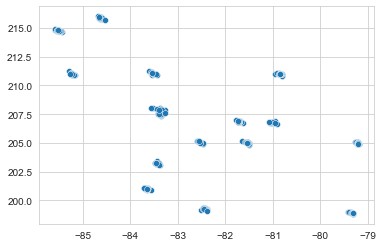

In [19]:
sns.scatterplot(x=Z[:,0], y = Z[:,1])